In [2]:
import networkx as nx # https://networkx.org/documentation/stable/tutorial.html
import numpy as np
import random
import argparse
import pickle
import torch
from gensim.models import Word2Vec # https://radimrehurek.com/gensim/

In [141]:
# Reference : https://github.com/Manu-Fraile/Network-Representation-Learning/blob/master/DeepWalk/main.py
# https://github.com/rlagywns0213/2021_Summer_Internship/blob/main/Graph%20Neural%20Network/RandomWalk/Deepwalk/train.py
# sg parameter if 1 skip gram for Word2Vec https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec 
# hs parameter if 1 hierarchical softmax
class DeepWalk(torch.nn.Module):
    def __init__(self, G, w= 10, d = 2, gamma = 20, t = 6):
      super(DeepWalk, self).__init__()
      self.G = G  
      self.w = w    #window size
      self.d = d    # embedding size
      self.gamma = gamma    # walks per vertex
      self.t = t  # walk length
      self.embedding = None

    def randomWalk(self, st_v): 
      one_walk = []
      current_node = st_v 
      one_walk.append(str(st_v)) 
      for j in range(self.t - 1): # self.t = walk_length 
        neighbors = list(G.edges([st_v])) 
        if (len(neighbors) > 0): 
          random_edge = random.choice(neighbors) 
          if (random_edge[0] == current_node): 
            current_node = random_edge[1] 
          else : 
            current_node = random_edge[0] 
        one_walk.append(str(current_node))
      return one_walk

    def train(self): 
      walks = []
      nodes = list(G.nodes())
      print('starting', len(self.G.nodes))
      for i in range(self.gamma): 
        random.shuffle(nodes)
        for node in nodes: 
          walks.append(self.randomWalk(node)) 
      # print(len(walks)) # gamma * t 

      skipgrammodelresult = Word2Vec(walks, size=self.d, window=self.w, sg=1, hs=1)
      self.embedding = skipgrammodelresult
      return self.embedding


[1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 21, 25, 23, 24, 27, 28, 29, 26, 30, 31, 32, 14, 15, 18, 20, 22, 33]


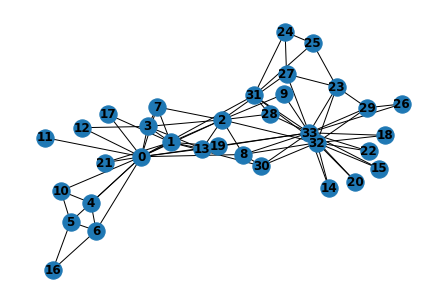

In [123]:

# Create a networkx graph object
my_graph = nx.Graph() 
 
edge_list = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2),
        (4, 0), (5, 0), (6, 0), (6, 4), (6, 5), (7, 0), (7, 1),
        (7, 2), (7, 3), (8, 0), (8, 2), (9, 2), (10, 0), (10, 4),
        (10, 5), (11, 0), (12, 0), (12, 3), (13, 0), (13, 1), (13, 2),
        (13, 3), (16, 5), (16, 6), (17, 0), (17, 1), (19, 0), (19, 1),
        (21, 0), (21, 1), (25, 23), (25, 24), (27, 2), (27, 23),
        (27, 24), (28, 2), (29, 23), (29, 26), (30, 1), (30, 8),
        (31, 0), (31, 24), (31, 25), (31, 28), (32, 2), (32, 8),
        (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23),
        (32, 29), (32, 30), (32, 31), (33, 8), (33, 9), (33, 13),
        (33, 14), (33, 15), (33, 18), (33, 19), (33, 20), (33, 22),
        (33, 23), (33, 26), (33, 27), (33, 28), (33, 29), (33, 30),
        (33, 31), (33, 32)]
my_graph.add_edges_from(edge_list)
 
# Draw the resulting graph
nx.draw(my_graph, with_labels=True, font_weight='bold')
G = my_graph
print(list(G.nodes()))

In [142]:
w = DeepWalk(G, 5, 2, 100, 5)

In [143]:
embedding = w.train()

starting 34


Text(0.5, 1.0, 'Representations of Karate Graph')

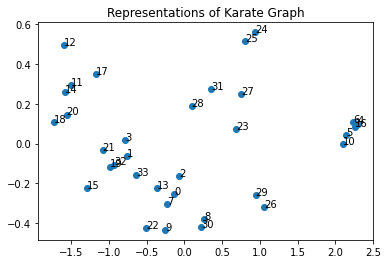

In [144]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x_coords = []
y_coords = []
word_vectors = [w.embedding.wv[v] for v in w.embedding.wv.vocab.keys()]
pca = PCA(n_components=2)
edge_list = w.embedding.wv.vocab
pca_result = pca.fit_transform(word_vectors)
for x,y in pca_result:
    x_coords.append(x)
    y_coords.append(y)
plt.scatter(x_coords, y_coords)
for i,v in enumerate(edge_list):
    plt.annotate(v,xy=(x_coords[i],y_coords[i]))
plt.title("Representations of Karate Graph")

In [ ]:
w = DeepWalk(G, 5, 3, 100, 5)
embedding = w.train()

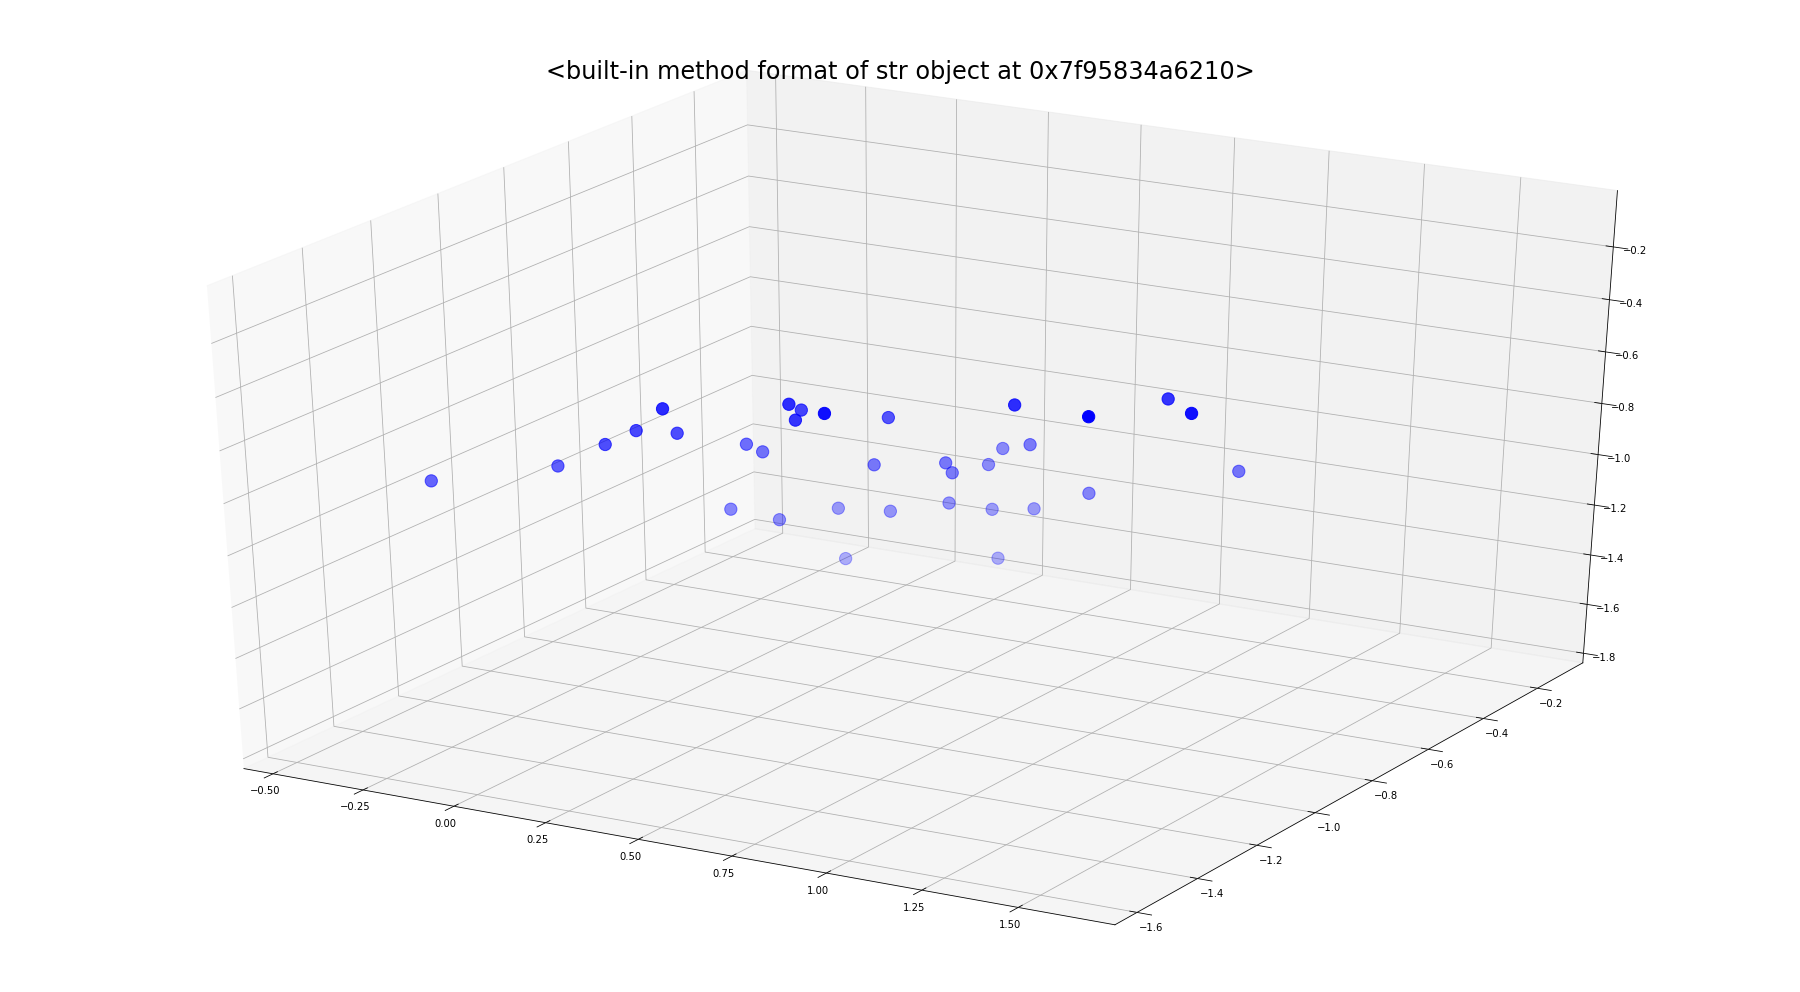

In [140]:
fig = plt.figure(figsize=(32,18))
ax = fig.gca(projection='3d')
vectors = w.embedding.wv.vectors
x, y, z = vectors[:,0], vectors[:,1], vectors[:,2]
ax.scatter(x,y,z, s=150, c='blue')
# for i in range(30):
#   if i in list(G.nodes()):
#     vec = w.embedding.wv[str(i)]
#     x, y, z = vec[0], vec[1], vec[2]
#     ax.scatter(x,y,z, s=500, c='red')
plt.title('representations for the graph '.format, fontsize=24)
plt.show()